In [70]:
from pycaret.regression import *
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import time as time
import seaborn as sns
from matplotlib import pyplot
from numpy import arange
from numpy import argmax
from pandas import set_option
set_option('display.max_rows', 500)
set_option('display.max_columns', 500)
set_option('display.width', 500)
#set_option('precision', 3)
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.preprocessing import binarize,PowerTransformer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.calibration import CalibratedClassifierCV ,calibration_curve
from sklearn.metrics import confusion_matrix,classification_report
#from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from imblearn.combine import SMOTEENN
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN,SMOTENC
from imblearn.under_sampling import ClusterCentroids,CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,RandomUnderSampler,TomekLinks
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.metrics import classification_report_imbalanced,geometric_mean_score,sensitivity_score,specificity_score
from imblearn.ensemble import BalancedBaggingClassifier,BalancedRandomForestClassifier,EasyEnsembleClassifier,RUSBoostClassifier
from collections import Counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,auc
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import SimpleImputer
from sklearn.metrics import SCORERS
from imblearn.over_sampling import SMOTE,RandomOverSampler
from collections import Counter
from scipy import stats
from scipy.stats import norm
from numpy import mean
from numpy import std
from scipy import stats
import numpy as np
from imblearn.metrics import sensitivity_score,specificity_score
sns.set_style(style='dark')
%matplotlib inline
from sklearn.metrics import roc_auc_score,balanced_accuracy_score,average_precision_score
from pycaret.classification import load_model
import warnings
warnings.filterwarnings("ignore")



In [71]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [41]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [46]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [47]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [48]:
# summarize the number of unique values in each column
print(df.nunique())

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [49]:
# locate rows of duplicate data
df.duplicated().any()

True

In [50]:
df = df.drop_duplicates()
df.shape

(1337, 7)

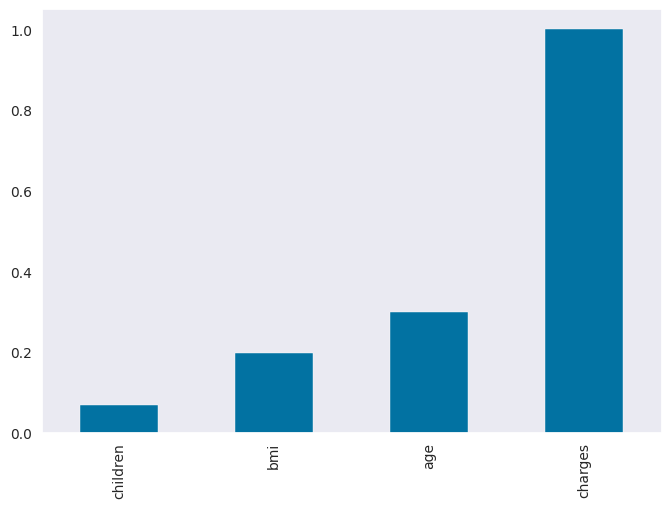

In [51]:
# plot correlation
df.corr()['charges'].sort_values().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix(for dataset)')

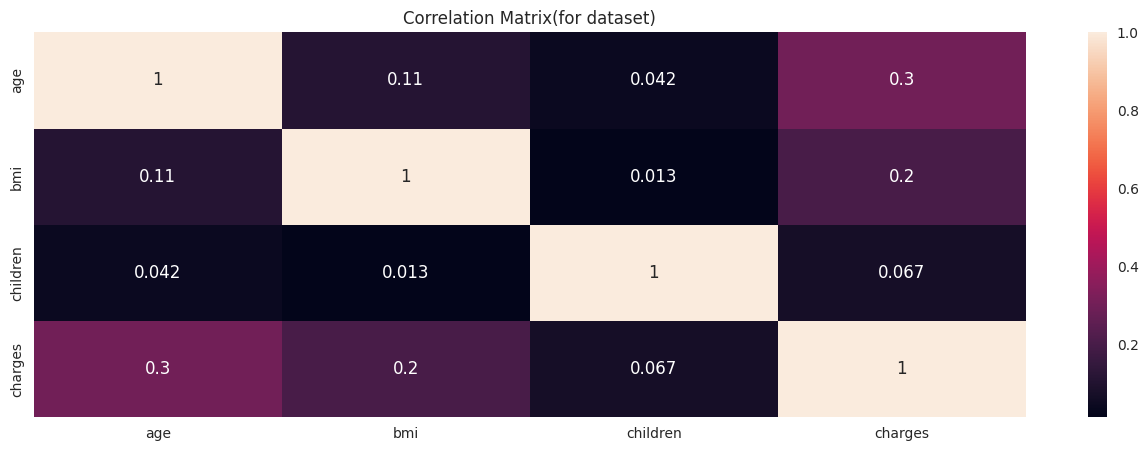

In [52]:
#Correlation for numeric
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation Matrix(for dataset)")

In [53]:
df.shape

(1337, 7)

In [54]:
df_num=df.select_dtypes(exclude ='object')
df_num.shape

(1337, 4)

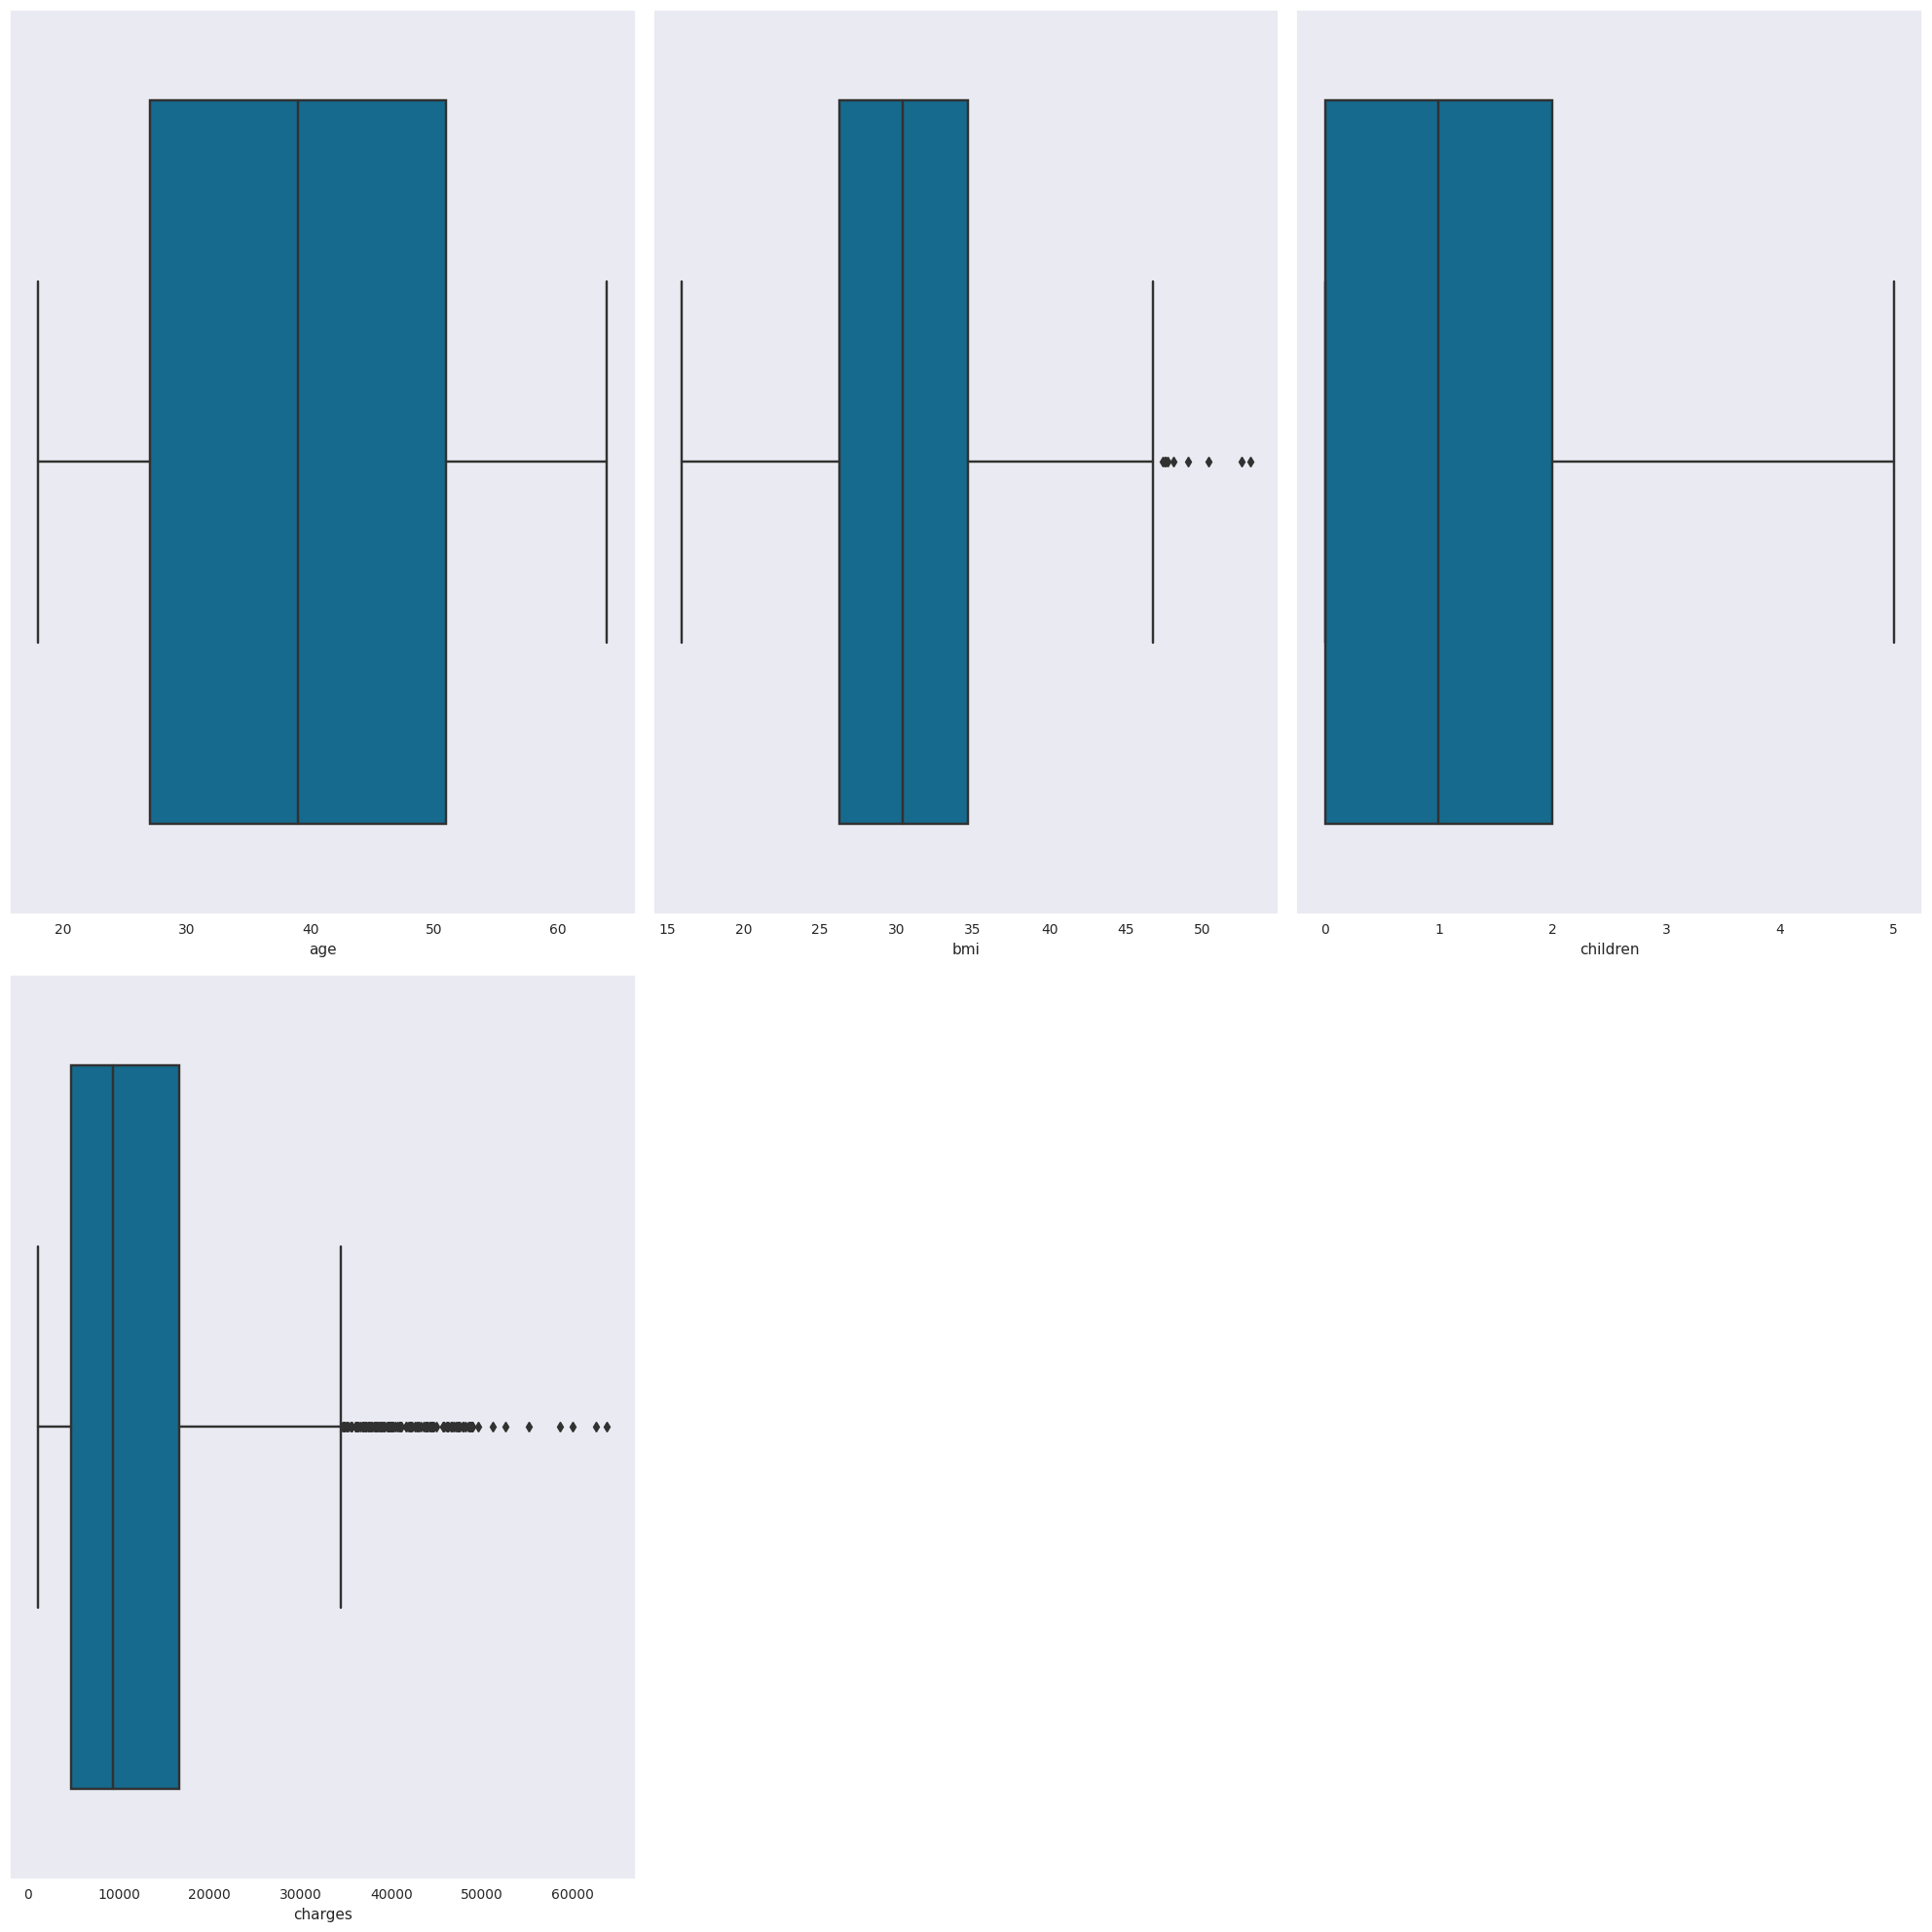

In [17]:
#Boxplot for checking of outliers
plt.figure(figsize=(20,20))
plotnumber = 1

for col in df_num.columns:
    if plotnumber < 5:
        plt.subplot(2,3,plotnumber)
        sns.boxplot(df_num[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


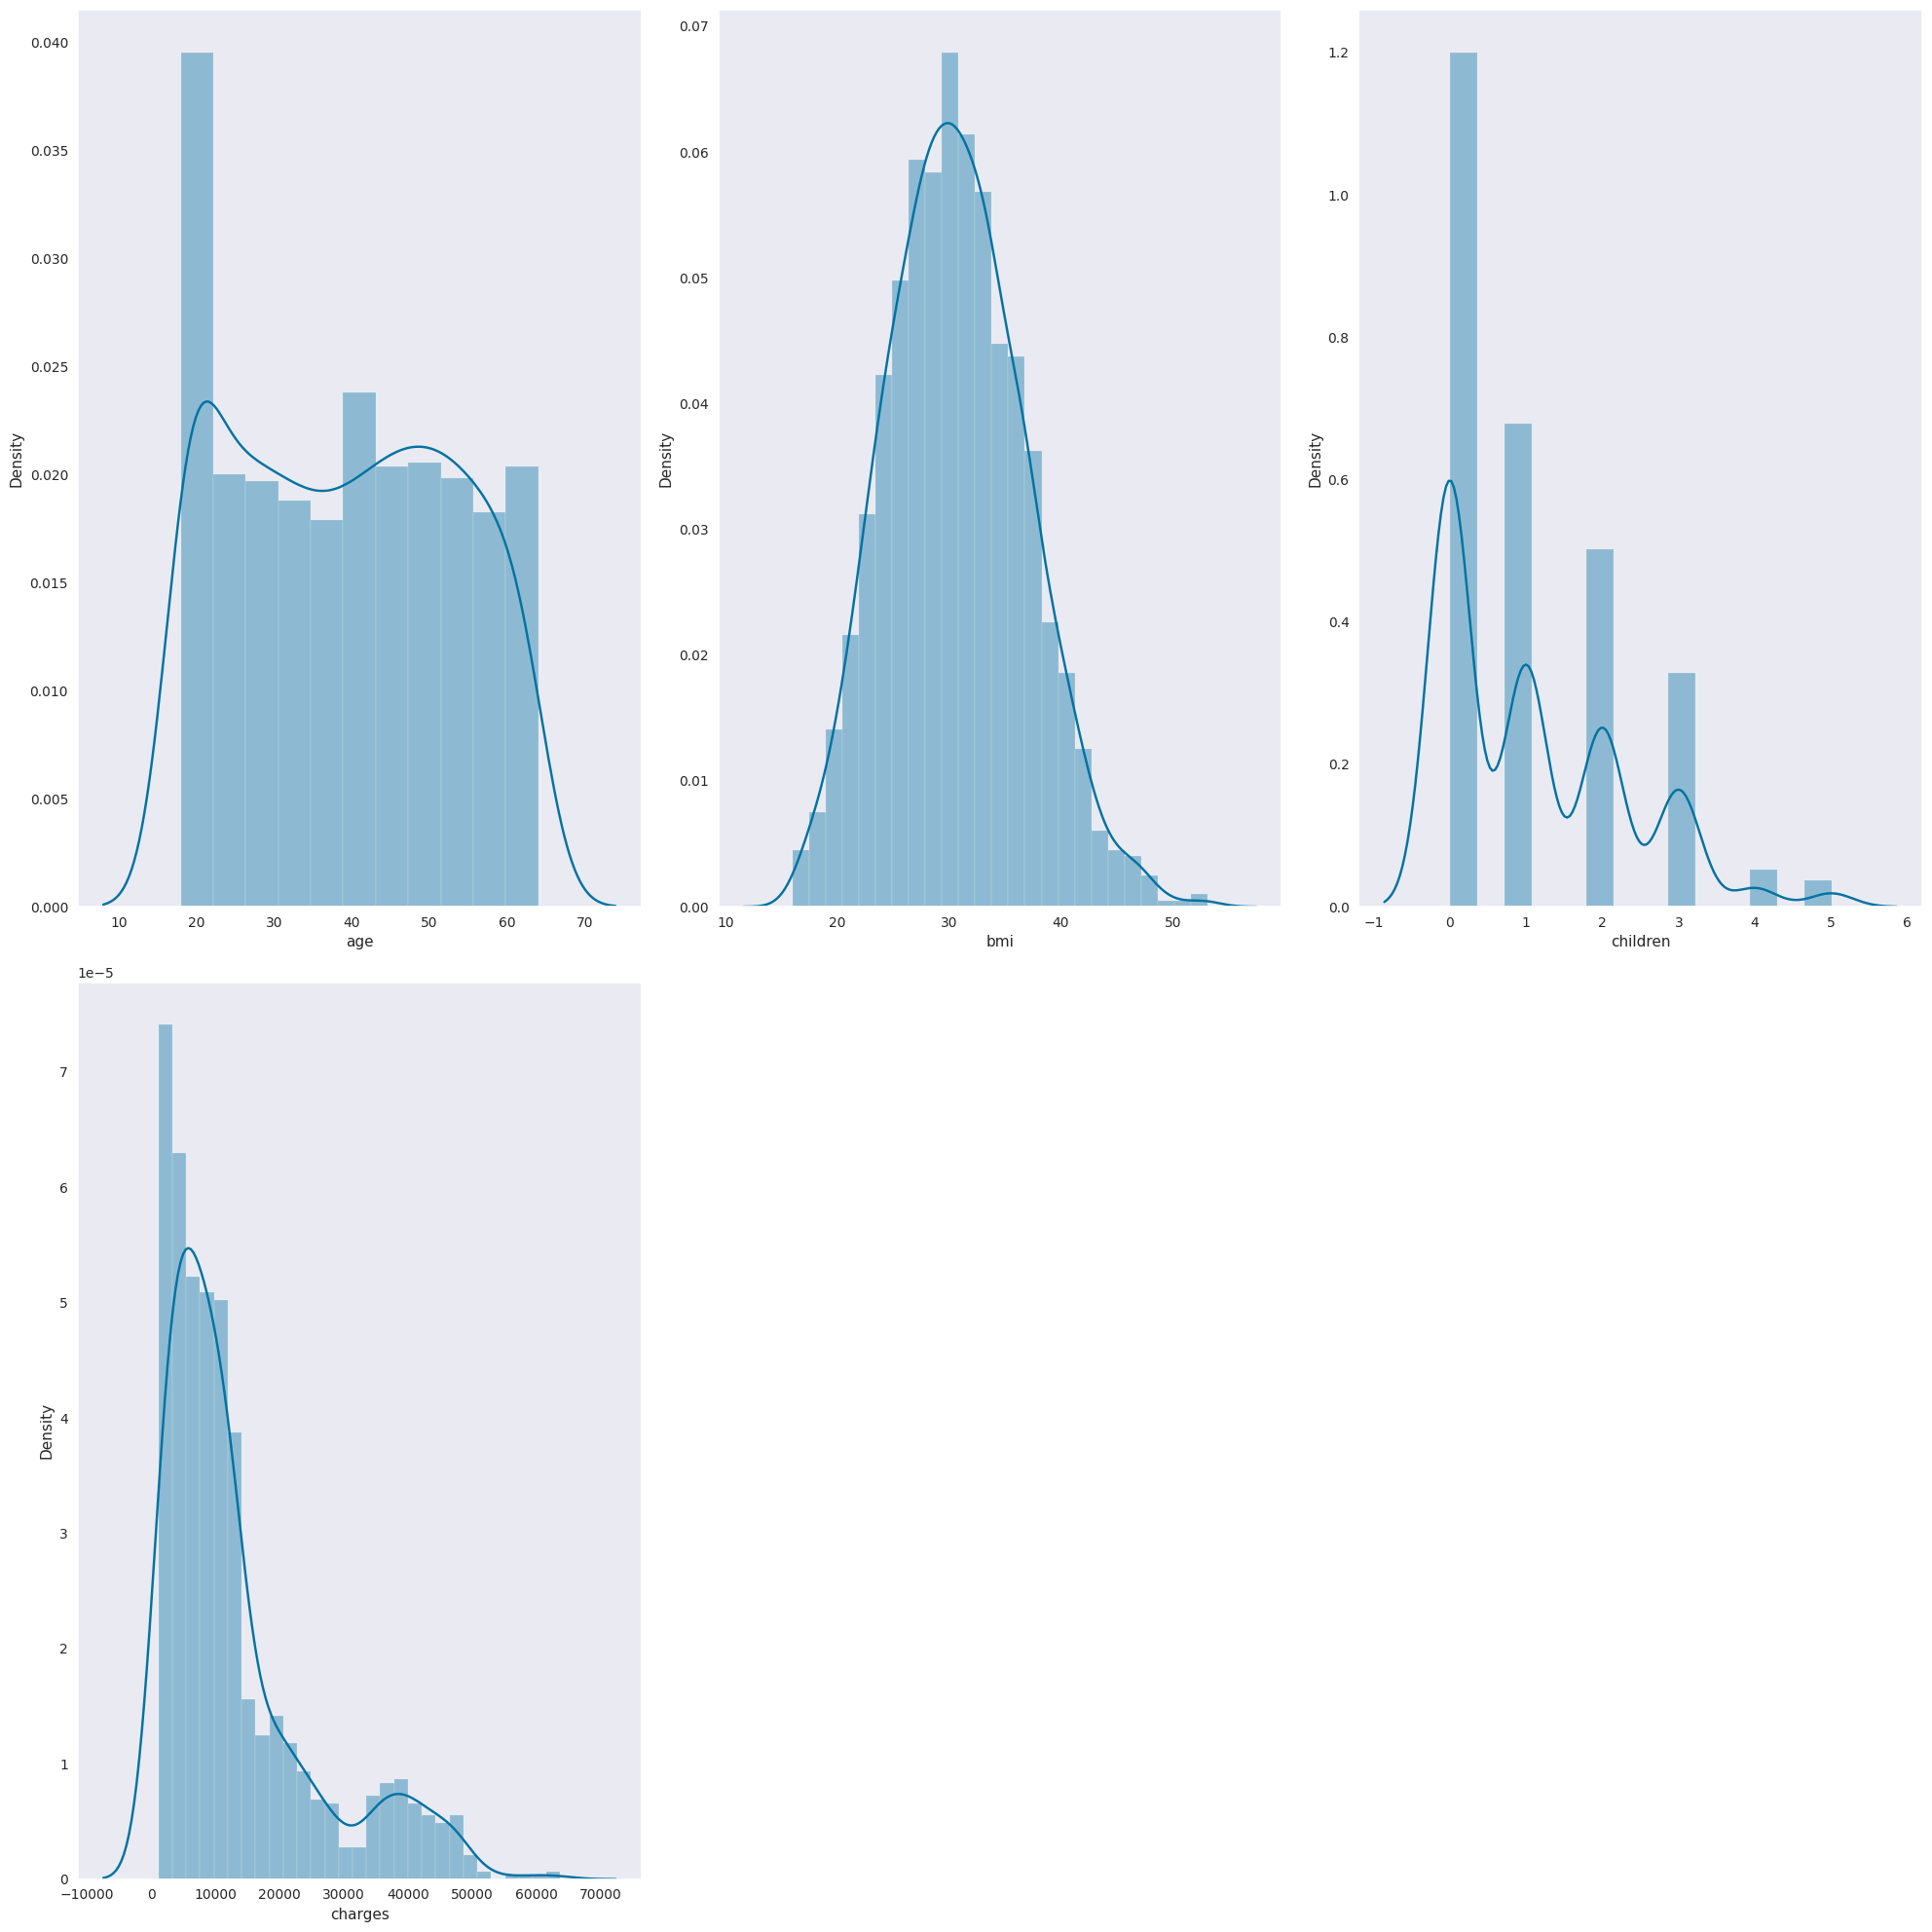

In [18]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,20))
plotnumber = 1

for col in df_num.columns:
    if plotnumber < 5:
        plt.subplot(2,3,plotnumber)
        sns.distplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


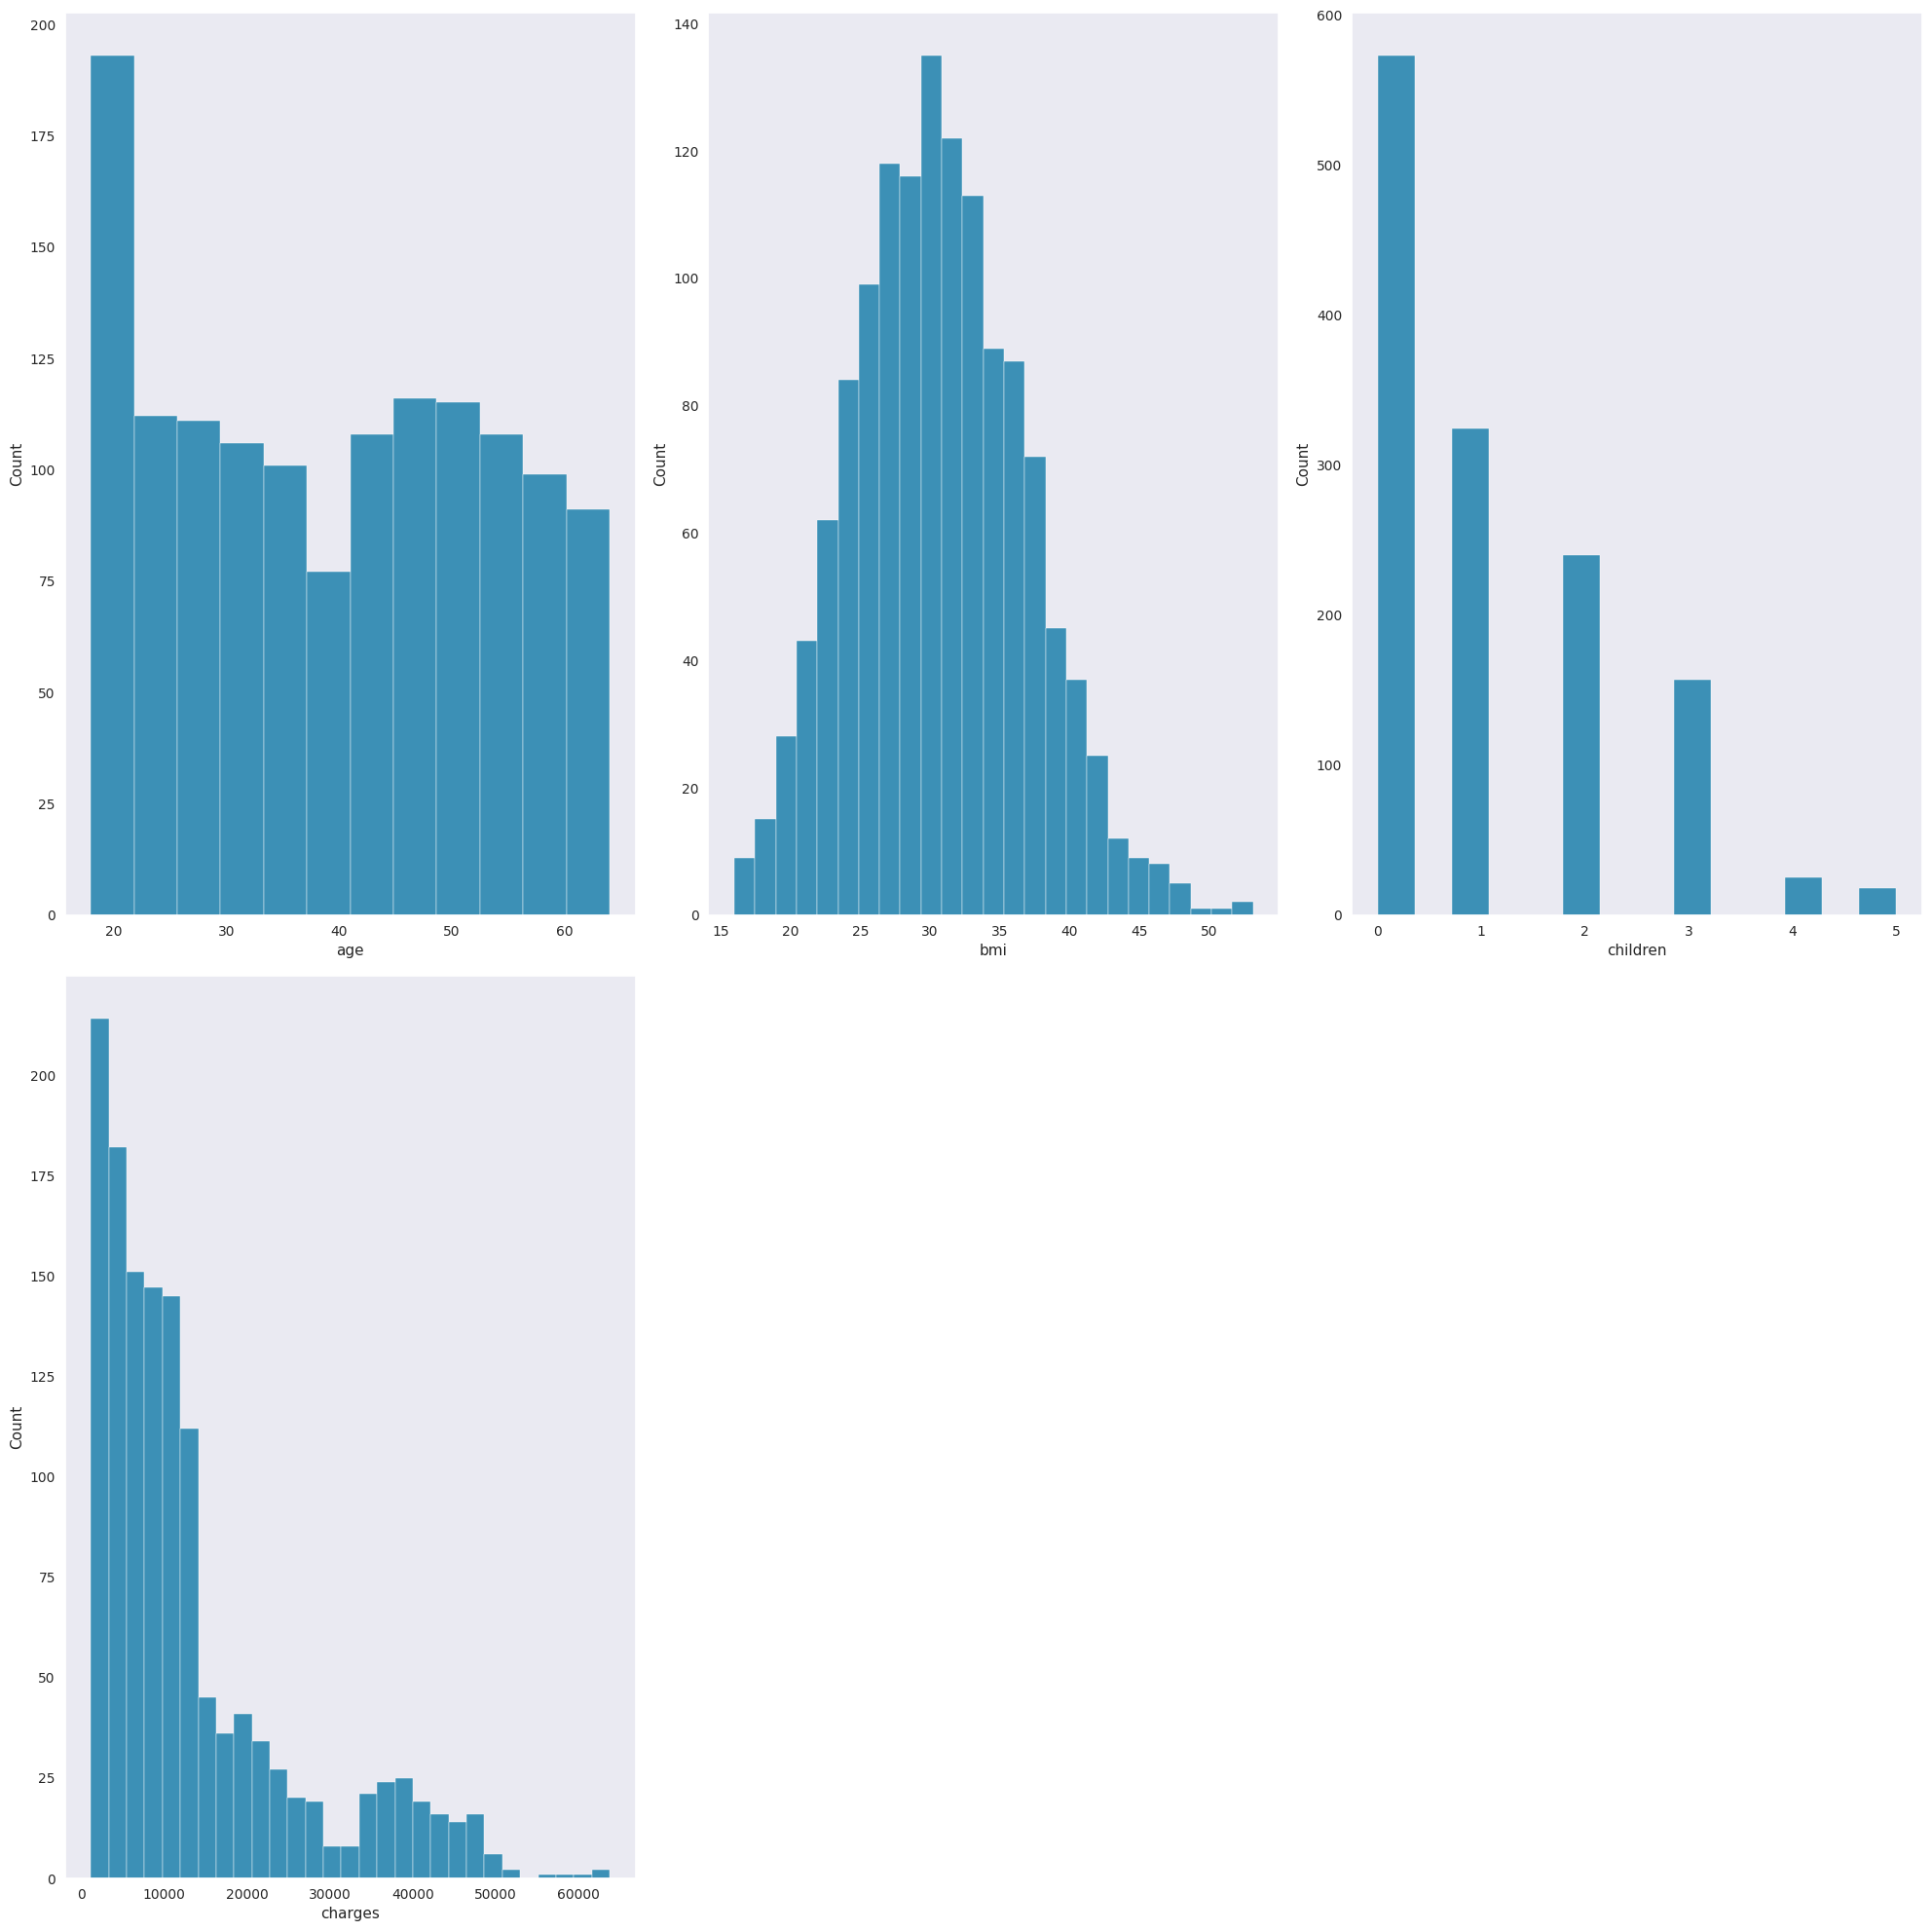

In [19]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(20,20))
plotnumber = 1

for col in df_num.columns:
    if plotnumber < 5:
        plt.subplot(2,3,plotnumber)
        sns.histplot(df_num[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [55]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
df=pd.get_dummies(df,columns= ['sex','children','smoker','region'],drop_first=True)
df

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [57]:
train, unseen = train_test_split(df,test_size=0.05, random_state=42,shuffle=True)
train.shape, unseen.shape


((1270, 13), (67, 13))

In [58]:
#set up environment
history = setup(data=train,
                     target='charges',preprocess=False,
                     #transform_target=True,
                     silent=True,
                     session_id=123)


# train using cross validation
Top3 = compare_models(n_select=3,sort='r2',exclude = ['catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2629.4897,22865032.0606,4708.0225,0.8391,0.4600,0.3323,0.0790
catboost,CatBoost Regressor,2745.2214,24166736.2822,4851.2380,0.8308,0.4983,0.3463,1.6600
lightgbm,Light Gradient Boosting Machine,2969.4344,24637866.6907,4908.7976,0.8276,0.5802,0.4022,0.1030
rf,Random Forest Regressor,2815.8330,25555381.7912,4980.0928,0.8212,0.5137,0.3818,0.2670
et,Extra Trees Regressor,2768.7009,28128266.3413,5201.3666,0.8021,0.5125,0.3516,0.2980
ada,AdaBoost Regressor,4318.4921,28912683.5283,5341.5071,0.7983,0.6684,0.8036,0.0300
ridge,Ridge Regression,4313.5619,37803771.8000,6119.2316,0.7367,0.6065,0.4585,0.0210
br,Bayesian Ridge,4310.7214,37807358.9473,6119.4742,0.7367,0.6273,0.4578,0.0190
lasso,Lasso Regression,4302.2320,37817289.0000,6120.0964,0.7366,0.6082,0.4559,0.0230
lar,Least Angle Regression,4302.2498,37816902.2343,6120.0565,0.7366,0.6049,0.4558,0.0310


In [59]:
Top3

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               ran

In [60]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3274.1929,36323203.8117,6026.8735,0.7519,0.4880,0.3765
1,2494.8750,19379792.3218,4402.2486,0.8517,0.4264,0.2818
2,3110.7118,34040572.6274,5834.4299,0.7604,0.5288,0.3102
3,3018.5042,30664105.1059,5537.5180,0.7904,0.4823,0.3630
4,2905.5674,26286179.7512,5127.0049,0.7816,0.4816,0.3277
5,2490.2922,19482532.8721,4413.9022,0.8997,0.4496,0.3266
6,2060.7537,11062760.3236,3326.0728,0.9355,0.4741,0.3844
7,2451.7784,18078793.4042,4251.9164,0.8666,0.4339,0.3458
8,2283.2698,17783167.3172,4217.0093,0.8735,0.4660,0.3327


In [61]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
X=get_config("X")
y=get_config("y")
X_train = get_config("X_train")
X_test = get_config("X_test")
y_train = get_config("y_train")
y_test = get_config("y_test")

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [108]:
# prepare the model

model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X_train, y_train)
# transform the validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

21034281.859007392
0.8466108535818504


In [109]:
# predict on validation set/hold-out set
pred_holdout = predict_model(gbr)
pred_holdout.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2490.4817,21034281.8590,4586.3146,0.8466,0.4005,0.2854


,age,bmi,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,charges,Label
0,37.0,30.799999,0,0,1,0,0,0,0,0,1,0,6313.758789,8576.032058
1,34.0,27.719999,0,0,0,0,0,0,0,0,1,0,4415.158691,5336.829112
2,22.0,28.049999,0,0,0,0,0,0,0,0,1,0,2155.681396,3389.982044
3,55.0,38.279999,1,0,0,0,0,0,0,0,1,0,10226.284180,12477.438392
4,27.0,30.400000,0,0,0,1,0,0,0,1,0,0,18804.751953,5108.225240


In [110]:
#finalize the model
final_gbr=finalize_model(gbr)
final_gbr

# predict on test set(unseen)
prediction=predict_model(final_gbr,data=unseen)
prediction.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2249.6779,14919574.0241,3862.5864,0.9280,0.3156,0.2753


,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest,Label
900,49,22.515,8688.85885,1,0,0,0,0,0,0,0,0,0,9992.449036
1064,29,25.600,5708.86700,0,0,0,0,1,0,0,0,0,1,8835.994070
1256,51,36.385,11436.73815,0,0,0,1,0,0,0,1,0,0,13321.021189
298,31,34.390,38746.35510,1,0,0,1,0,0,1,1,0,0,39605.813657
237,31,38.390,4463.20510,1,0,1,0,0,0,0,0,1,0,6169.246705


In [111]:
un = unseen.copy()
un.drop(columns='charges',inplace=True)
yy=unseen['charges']

In [156]:
# prepare the model

model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X, y)
# transform the validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(un)
print(mean_squared_error(yy, predictions))
print(r2_score(yy, predictions))

14919574.024090657
0.9280158808088741


In [114]:
from pickle import dump
from pickle import load

In [157]:
# Fit the model on 33%
model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(X, y)
filename = 'finalized_model.pkl'
dump(model, open(filename, 'wb'))


In [158]:
loaded_model = load(open('finalized_model.pkl', 'rb'))
predictions = loaded_model.predict(un)
print(mean_squared_error(yy, predictions))
print(r2_score(yy, predictions))

14919574.024090657
0.9280158808088741
